### ShumetieTefera_TermDeposit_Capstone_Project

## <font color=blue>Project Description & Objective </font>
 > Machine learning (ML) has numerous applications in finance and banking, including fraud detection, risk management, credit scoring, investment analysis, customer segmentation, and portfolio optimization. ML algorithms can be used to analyze financial data and make informed predictions. It can help financial and banking institutions to make more accurate predictions and decisions, reduce risks, and improve customer satisfaction. However, it's important to note that ML models require high-quality and relevant data to be effective.
 
>  This data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no')
   
> A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. 
   
> There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 25% of the examples (11162), randomly selected from bank-full.csv.
   The smaller dataset will be used in this project to test more computationally demanding machine learning algorithms (e.g. SVM).

> In this notebook we will use the dataset to build a model to predict whether someone is going to make a deposit or not depending on some attributes. We wiill try to build models using different classification algorithms (<font color=red> Logistic Regression, Support Vector Machine/SVM, Random Forest, K-Nearest Neighbors,Gradient Decent and XGBoost </font>).
> After building each model we will evalueate them and compare which model are the best for our case. We will then try to optimze our model by tuning the hyperparamters of the model by using GridSearch. Lastly, we will save the prediction result from our dataset and then save our model for reussability.


### <font color=blue>Objective:</font>
The classification goal is to predict if the client will subscribe ('yes')a term deposit (variable y) or not ('no').

## <font color=blue>Import Required Packages & Libraries</font>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, make_scorer
import warnings
warnings.filterwarnings("ignore")



## <font color=blue>Load Dataset</font>

In [2]:
# check dataset path
os.listdir()

['.ipynb_checkpoints',
 'bank (1).csv',
 'bank-full (1).csv',
 'bank-names (1).txt',
 'ShumetieTefera_TermDeposit_Capstone.ipynb',
 'ShumetieTefera_TermDeposit_Capstone.pkl']

In [3]:
# Load Dataset
df=pd.read_csv('bank (1).csv')

In [4]:
# First few rows of data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
# Last few rows of data
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


## <font color=blue>Data Dictionary</font>

- <b>age:</b> age of client (<font color=red>numeric</font>)
- <b>job :</b> type of job 
    (<font color=red>categorical:</font> "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
- <b>marital :</b> marital status 
    (<font color=red>categorical:</font> "married","divorced","single"; note: "divorced" means divorced or widowed)
- <b>education</b> (<font color=red>categorical:</font> "unknown","secondary","primary","tertiary")
- <b>default:</b> has credit in default? (<font color=red>binary:</font> "yes","no")
- <b>balance:</b> average yearly balance, in euros (<font color=red>numeric</font>) 
- <b>housing:</b> has housing loan? (<font color=red>binary:</font> "yes","no")
- <b>loan:</b> has personal loan? (<font color=red>binary:</font> "yes","no")
   ### related with the last contact of the current campaign:
- <b>contact:</b> contact communication type (<font color=red>categorical:</font> "unknown","telephone","cellular") 
- <b>day: </b>last contact day of the month (<font color=red>numeric</font>)
- <b>month:</b> last contact month of year (<font color=red>categorical:</font> "jan", "feb", "mar", ..., "nov", "dec")
- <b>duration:</b> last contact duration, in seconds (<font color=red>numeric</font>)
   ### other attributes:
- <b>campaign:</b> number of contacts performed during this campaign and for this client (<font color=red>numeric</font>, includes last contact)
- <b>pdays:</b> number of days that passed by after the client was last contacted from a previous campaign (<font color=red>numeric</font>, -1 means client was not previously contacted)
- <b>previous:</b> number of contacts performed before this campaign and for this client (<font color=red>numeric</font>)
- <b>poutcome:</b> outcome of the previous marketing campaign (<font color=red>categorical:</font> "unknown","other","failure","success")

  ### Output variable (target):- 
- <b>deposit:</b> has the client subscribed a term deposit or not? (<font color=red>binary:</font> "yes","no")


#### <font color=blue>Renaming Columns</font>
Some original column names are not very descriptive (are ambiguous). Changing the column names to something descriptive would make it easier to understand what the column represents.

In [6]:
# Original column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [7]:
df=df.copy()
# Renaming column names
new_column_names = {
    "age": "Age",
    "job": "Job_Type",
    "marital": "Marital_Status",
    "education": "Education_Level",
    "default": "Credit_In_Default",
    "balance": "Balance",
    "housing": "Housing_Loan",
    "loan": "Personal_Loan",
    "contact": "Contact_Type",
    "day": "Last_Contact_Day",
    "month": "Last_Contact_Month",
    "duration": "Last_Contact_Duration",
    "campaign": "No_of_Contacts",
    "pdays": "No_of_Days_Passed",
    "previous": "Previous_No_of_Contacts",
    "poutcome": "Previous_Campaign_Outcome",
    "deposit": "Deposit"
 }
df = df.rename(columns=new_column_names)

In [8]:
df.head(2)

,Age,Job_Type,Marital_Status,Education_Level,Credit_In_Default,Balance,Housing_Loan,Personal_Loan,Contact_Type,Last_Contact_Day,Last_Contact_Month,Last_Contact_Duration,No_of_Contacts,No_of_Days_Passed,Previous_No_of_Contacts,Previous_Campaign_Outcome,Deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes


## <font color=blue>Exploratory Data Analysis(EDA)</font>
### <font color=blue>Univariate Analysis</font>

#### <font color=blue>Data overview</font>

In [9]:
df.shape

(11162, 17)

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
<ul>
 <li>There are 11162 rows and 17 columns in the dataset,
          total of 16 features and 1 target variable</li>
 
 </ul>
</div>

#### <font color=blue>Duplicates</font>

In [10]:
# check for existence of duplicates in the dataset
len(df[df.duplicated()])

0

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
<ul>
 <li>There are no duplicates</li>
 
 </ul>
</div>

#### <font color=blue>Variable Types of Columns</font>

In [11]:
df.dtypes

Age                           int64
Job_Type                     object
Marital_Status               object
Education_Level              object
Credit_In_Default            object
Balance                       int64
Housing_Loan                 object
Personal_Loan                object
Contact_Type                 object
Last_Contact_Day              int64
Last_Contact_Month           object
Last_Contact_Duration         int64
No_of_Contacts                int64
No_of_Days_Passed             int64
Previous_No_of_Contacts       int64
Previous_Campaign_Outcome    object
Deposit                      object
dtype: object

#### <font color=blue>Find Missing Values</font>

In [12]:
df.isnull().any().sum()

0

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
<ul>
 <li>There are no null (missing) values in the dataset </li>
 
 </ul>
</div>

#### <font color=blue>count of unique values in a column</font>

In [13]:
for column in df.columns:
    print(column,df[column].nunique())

Age 76
Job_Type 12
Marital_Status 3
Education_Level 4
Credit_In_Default 2
Balance 3805
Housing_Loan 2
Personal_Loan 2
Contact_Type 3
Last_Contact_Day 31
Last_Contact_Month 12
Last_Contact_Duration 1428
No_of_Contacts 36
No_of_Days_Passed 472
Previous_No_of_Contacts 34
Previous_Campaign_Outcome 4
Deposit 2


#### <font color=blue> i. Numerical Features Analysis </font>

In [14]:
num_features = (df.select_dtypes(include=['int64'])).columns

print(num_features)
print("Numerical features Count:{}".format(len(num_features)))

Index(['Age', 'Balance', 'Last_Contact_Day', 'Last_Contact_Duration',
       'No_of_Contacts', 'No_of_Days_Passed', 'Previous_No_of_Contacts'],
      dtype='object')
Numerical features Count:7


In [15]:
df.describe(percentiles=[.8,.90,.95,.99]).T

,count,mean,std,min,50%,80%,90%,95%,99%,max
Age,11162.0,41.231948,11.913369,18.0,39.0,52.0,58.0,61.00,77.00,95.0
Balance,11162.0,1528.538524,3225.413326,-6847.0,550.0,2223.0,3897.6,6026.45,13226.98,81204.0
Last_Contact_Day,11162.0,15.658036,8.420740,1.0,15.0,24.0,28.0,30.00,31.00,31.0
Last_Contact_Duration,11162.0,371.993818,347.128386,2.0,255.0,585.0,838.0,1079.90,1577.17,3881.0
No_of_Contacts,11162.0,2.508421,2.722077,1.0,2.0,3.0,5.0,7.00,13.00,63.0
No_of_Days_Passed,11162.0,51.330407,108.758282,-1.0,-1.0,95.0,191.0,326.00,425.39,854.0
Previous_No_of_Contacts,11162.0,0.832557,2.292007,0.0,0.0,1.0,3.0,5.00,10.00,58.0


<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
<ul>
 <li>  The average age of the customers who were contacted for the term deposit campaign is around 41 years old  </li>
 <li>  majority of customers contacted have an account balance of less than 2,223 euros  </li>
 <li> majority of customers being contacted less than 7 times (95%).   </li>
 <li>  mean value of the duration of the last contact in seconds is 372, with most contacts lasting less than 500 seconds  </li>
 <li> There are many outliers in some features of the dataset   </li>
  </ul>
</div>

Skewness of column 'Age': 0.86
Skewness of column 'Balance': 8.22
Skewness of column 'Last_Contact_Day': 0.11
Skewness of column 'Last_Contact_Duration': 2.14
Skewness of column 'No_of_Contacts': 5.55
Skewness of column 'No_of_Days_Passed': 2.45
Skewness of column 'Previous_No_of_Contacts': 7.34


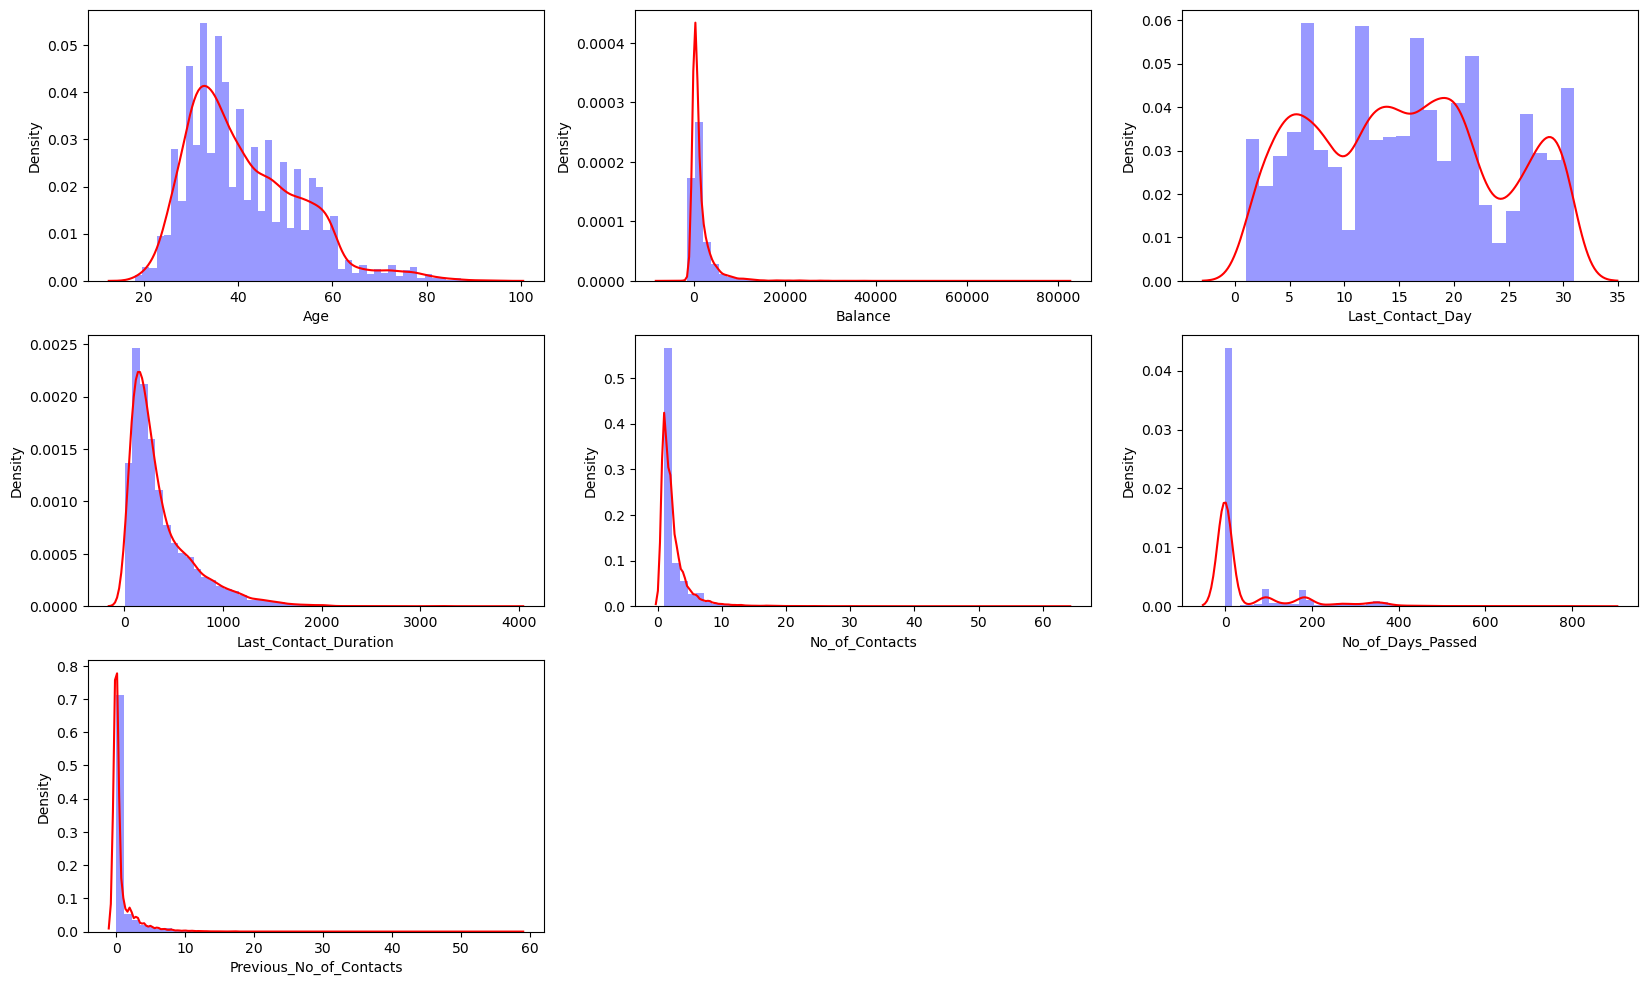

In [16]:
# univariate distribution of numerical features

plt.figure(figsize=(20,50))
plotnumber =1
for num_feature in num_features:
    skewness = df[num_feature].skew()
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[num_feature],hist_kws={"color": "blue"}, kde_kws={"color": "red"})
    plt.xlabel(num_feature)
    print(f"Skewness of column '{num_feature}': {skewness:.2f}")
    plotnumber+=1
    
plt.show()


<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> Age, Last_Contact_Day columns look distributed normally </li>
     <li> Balance, Last_Contact_Duration, No_of_Contacts, No_of_Days_Passed and Previous_No_of_Contacts are positively skewed and seem to have some outliers </li>
    </ul>
</div>


#### <font color=blue>ii. Categorical Features</font>

In [17]:
cat_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['Deposit']))]

print(cat_features)
print("Numerical features Count:{}".format(len(cat_features)))

['Job_Type', 'Marital_Status', 'Education_Level', 'Credit_In_Default', 'Housing_Loan', 'Personal_Loan', 'Contact_Type', 'Last_Contact_Month', 'Previous_Campaign_Outcome']
Numerical features Count:9


In [18]:
# count of each value in each cat column
cat_counts=[]
for cat_col in cat_features:
    cat_counts = df[cat_col].value_counts()
    print(cat_counts)
    print('__________________________')
    cat_counts += 1

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: Job_Type, dtype: int64
__________________________
married     6351
single      3518
divorced    1293
Name: Marital_Status, dtype: int64
__________________________
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: Education_Level, dtype: int64
__________________________
no     10994
yes      168
Name: Credit_In_Default, dtype: int64
__________________________
no     5881
yes    5281
Name: Housing_Loan, dtype: int64
__________________________
no     9702
yes    1460
Name: Personal_Loan, dtype: int64
__________________________
cellular     8042
unknown      2346
telephone     774
Name: Contact_Type, dtype: int64
__________________________
may    2824
aug    1519
jul    1514
jun    1222
nov     94

<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    There are
    <ul>
        <li>70 'Unknown' values in Job_Type column </li>
        <li>497 'Unknown' values in Education_Level column</li>
        <li>2346 'Unknown' values in Contact_Type column</li>
        <li>8326 'Unknown' values in Previous_Campaign_Outcome column </li>
    </ul>
</div>


In [19]:
# Define Function to create lable percentages on top of count plot of each categorical feature
def percent_label(ax, spacing=0.5):
    p = 0
    for rect in ax.patches:
        p += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}".format( y_value/p*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va) 

Job_Type


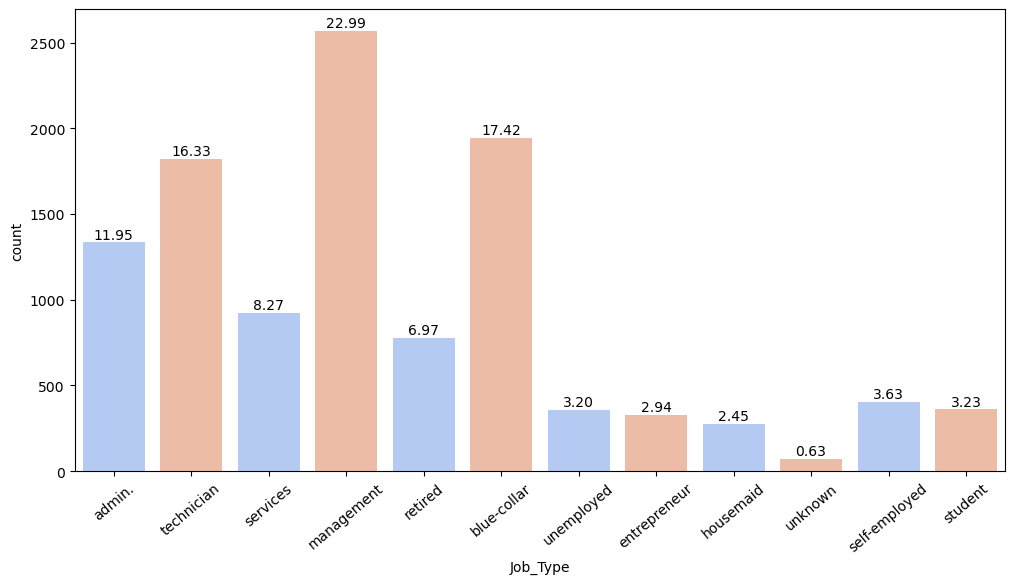

Marital_Status


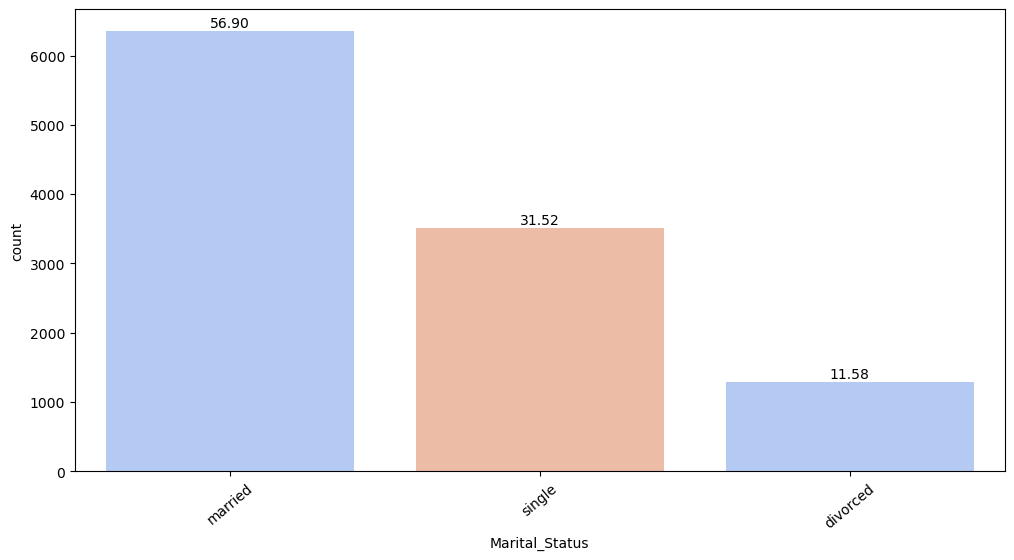

Education_Level


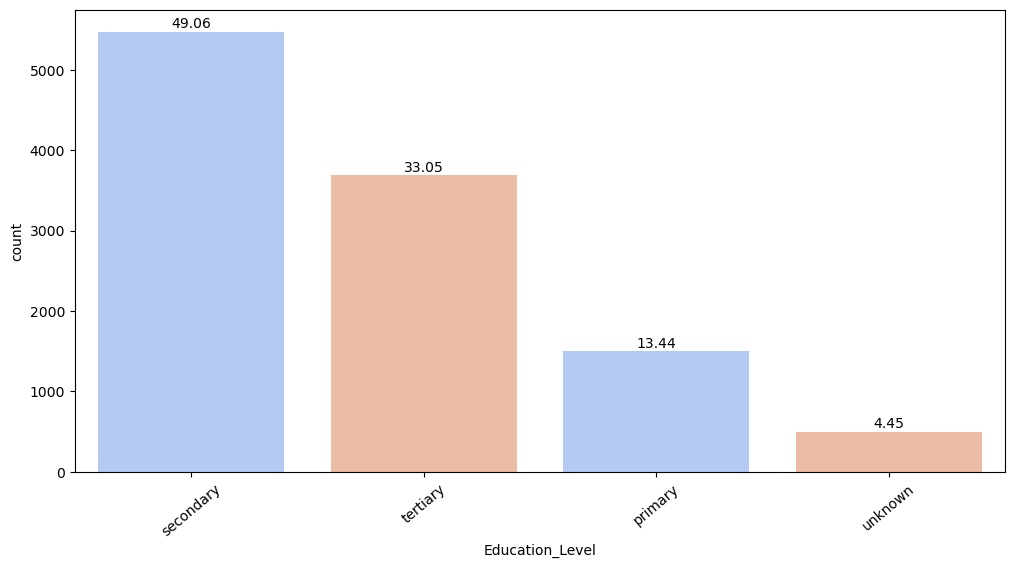

Credit_In_Default


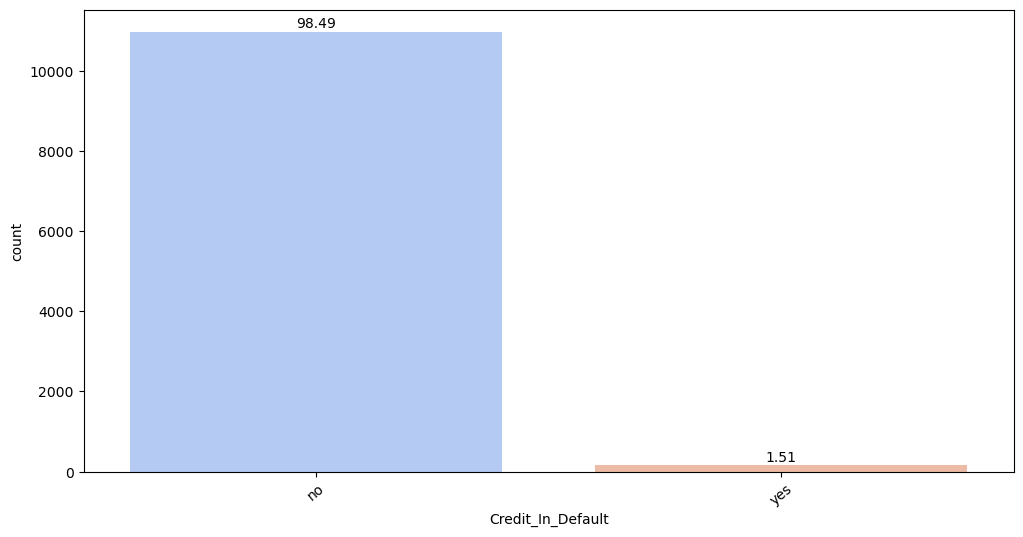

Housing_Loan


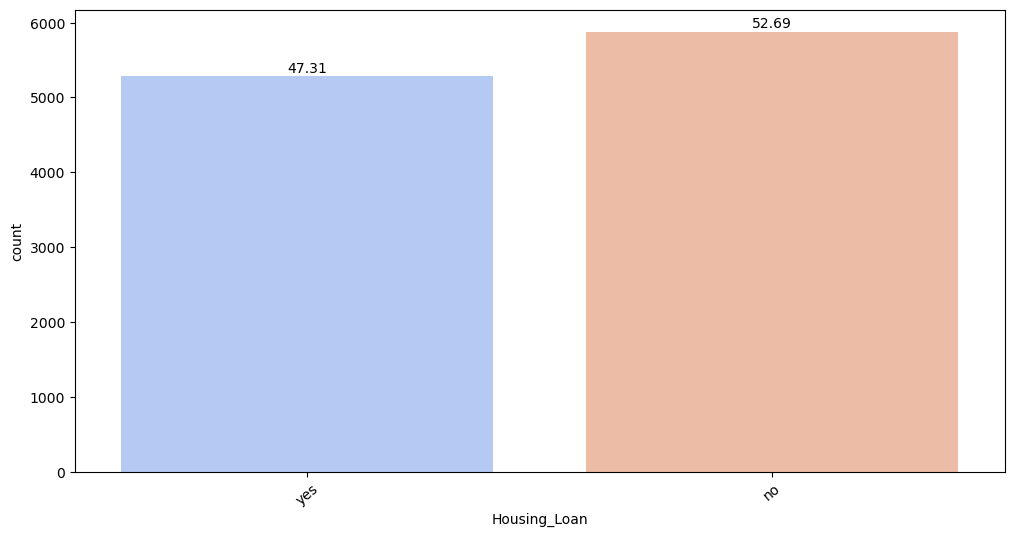

Personal_Loan


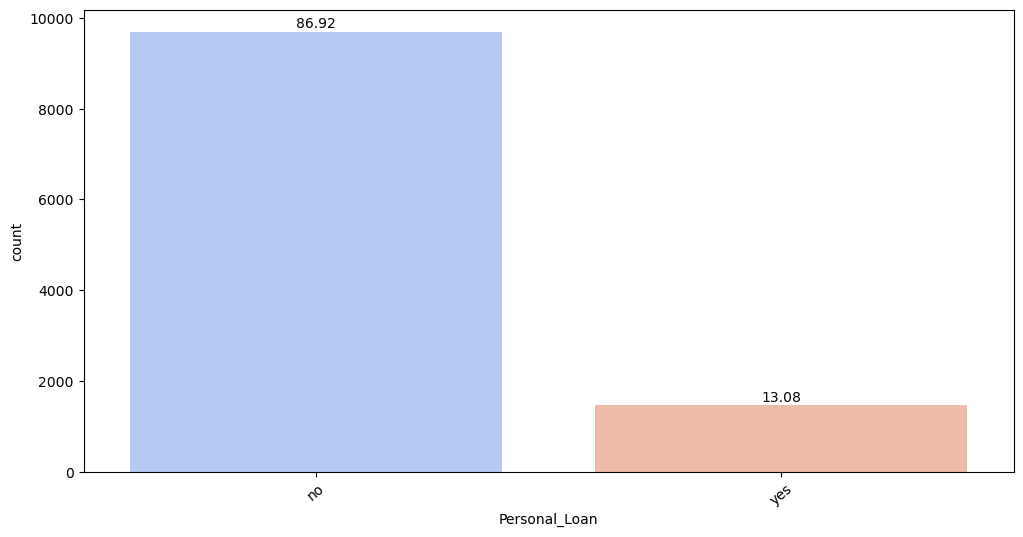

Contact_Type


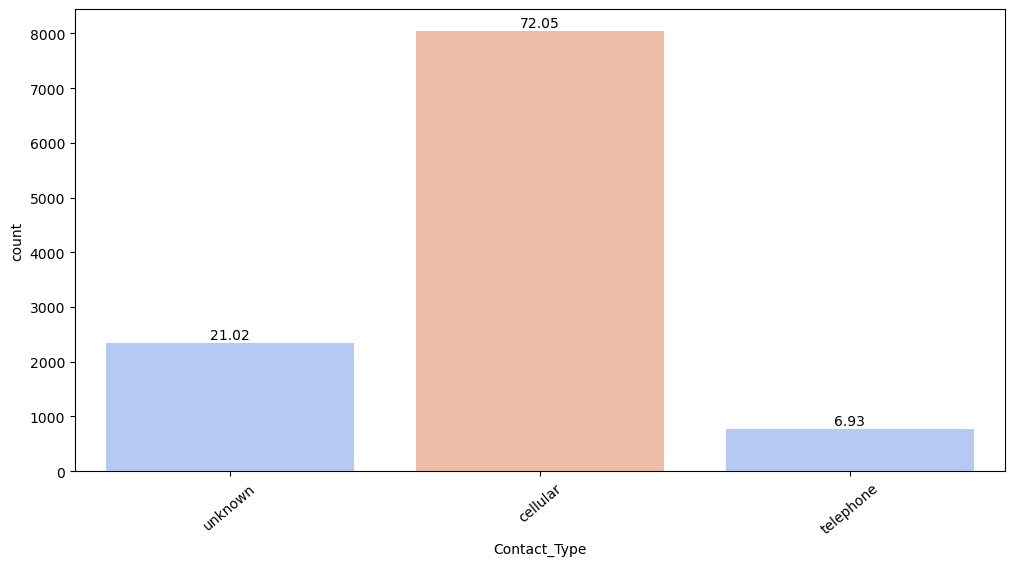

Last_Contact_Month


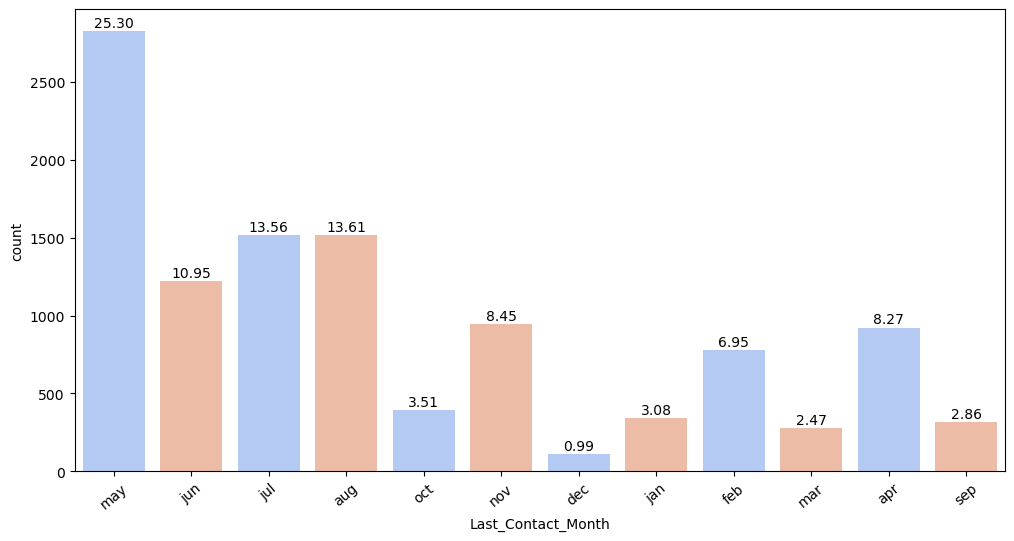

Previous_Campaign_Outcome


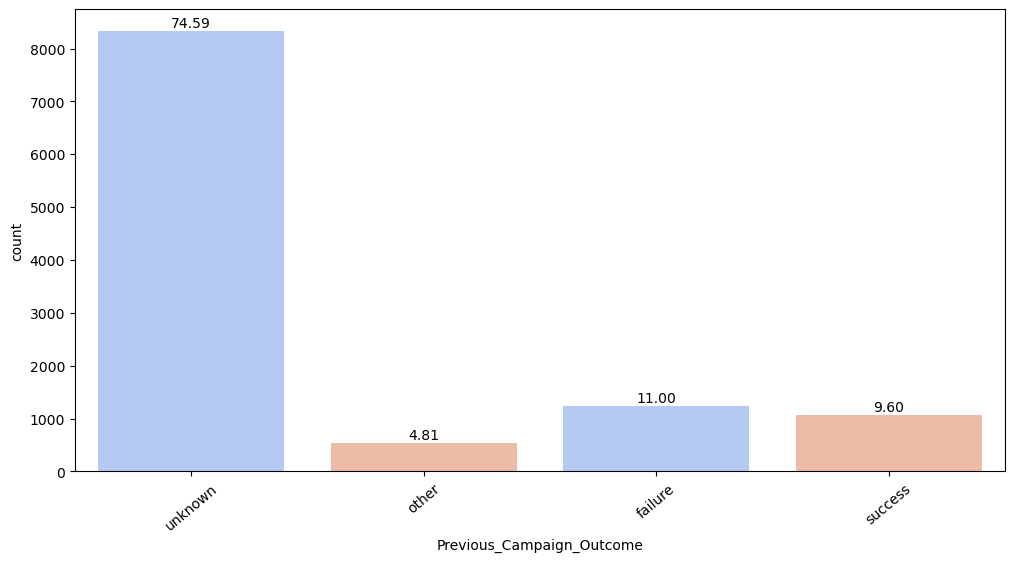

In [20]:
# create the plot for the cat vars
for column in cat_features:
    plt.figure(figsize=(12, 6))
    plt.xticks(rotation=40)
    print(column.title())
    ax = sns.countplot(x = df[column], palette=sns.color_palette('coolwarm', n_colors=2))
    percent_label(ax)
    plt.show()

<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> Job: Highest Number (around 23%) of clients are from Management type of job </li>
     <li> Marital_Status: Around 57% of clients who were approached were married. </li>  
     <li> Education_Level: Client with tertiary and high school educ who were approached gave higher success rate in subscribing the term deposit (around 83%). </li>
     <li> Credit_In_Default: Default variable has no impact on the client subscribing for term deposit.(Only 1.5% success) </li>
     <li> Housing_Loan: Housing loan does not have much effect on the number of term deposit purchased.(difference/effect of 3% only) </li>
     <li> Personal_Loan:Majority of the cliens approached were with not having personal loan </li>
     <li> Contact_Type:More than 72% of the contacts/approaches were from cellular </li>
     <li> Around 25% of the approaches were made in May, and a significant amount also in Jul, Jun and Aug </li>
     <li> Previous_Campaign_Outcome:  previous marketing campaign outcome was not properly recorded/documented as mround 75% of them show unknon outcome </li>       
        
</ul>
</div>

#### <font color=blue>iii. Target variable Analysis </font>

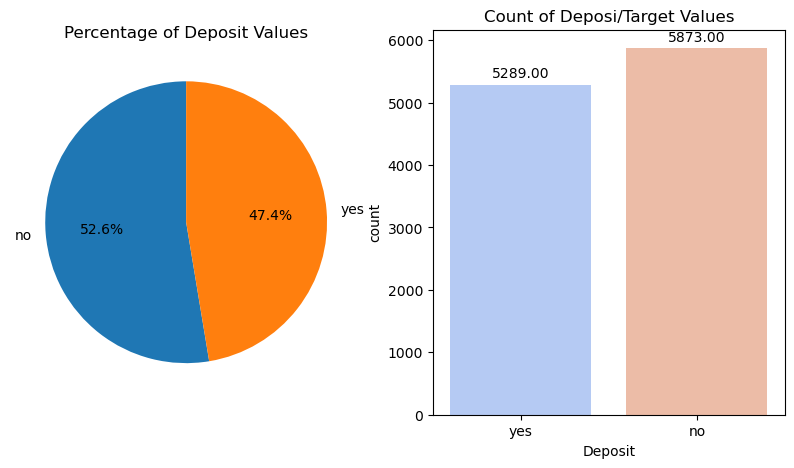

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create a pie chart in the first column to show the percentage of target values
axs[0].pie(df['Deposit'].value_counts(), labels=df['Deposit'].value_counts().index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Percentage of Deposit Values')

# Create a count plot in the second column to show the count of each target value
plots=sns.countplot(data=df, x=df["Deposit"], palette=sns.color_palette('coolwarm', n_colors=2))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
axs[1].set_title('Count of Deposi/Target Values')

# Display the plot
plt.show()

<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> Target variable Data is almost balanced </li>
     <li>but it is nice to have 50:50. </li>  
     
</ul>
</div>

### <font color=blue>iv. Bivariate Analysis</font>

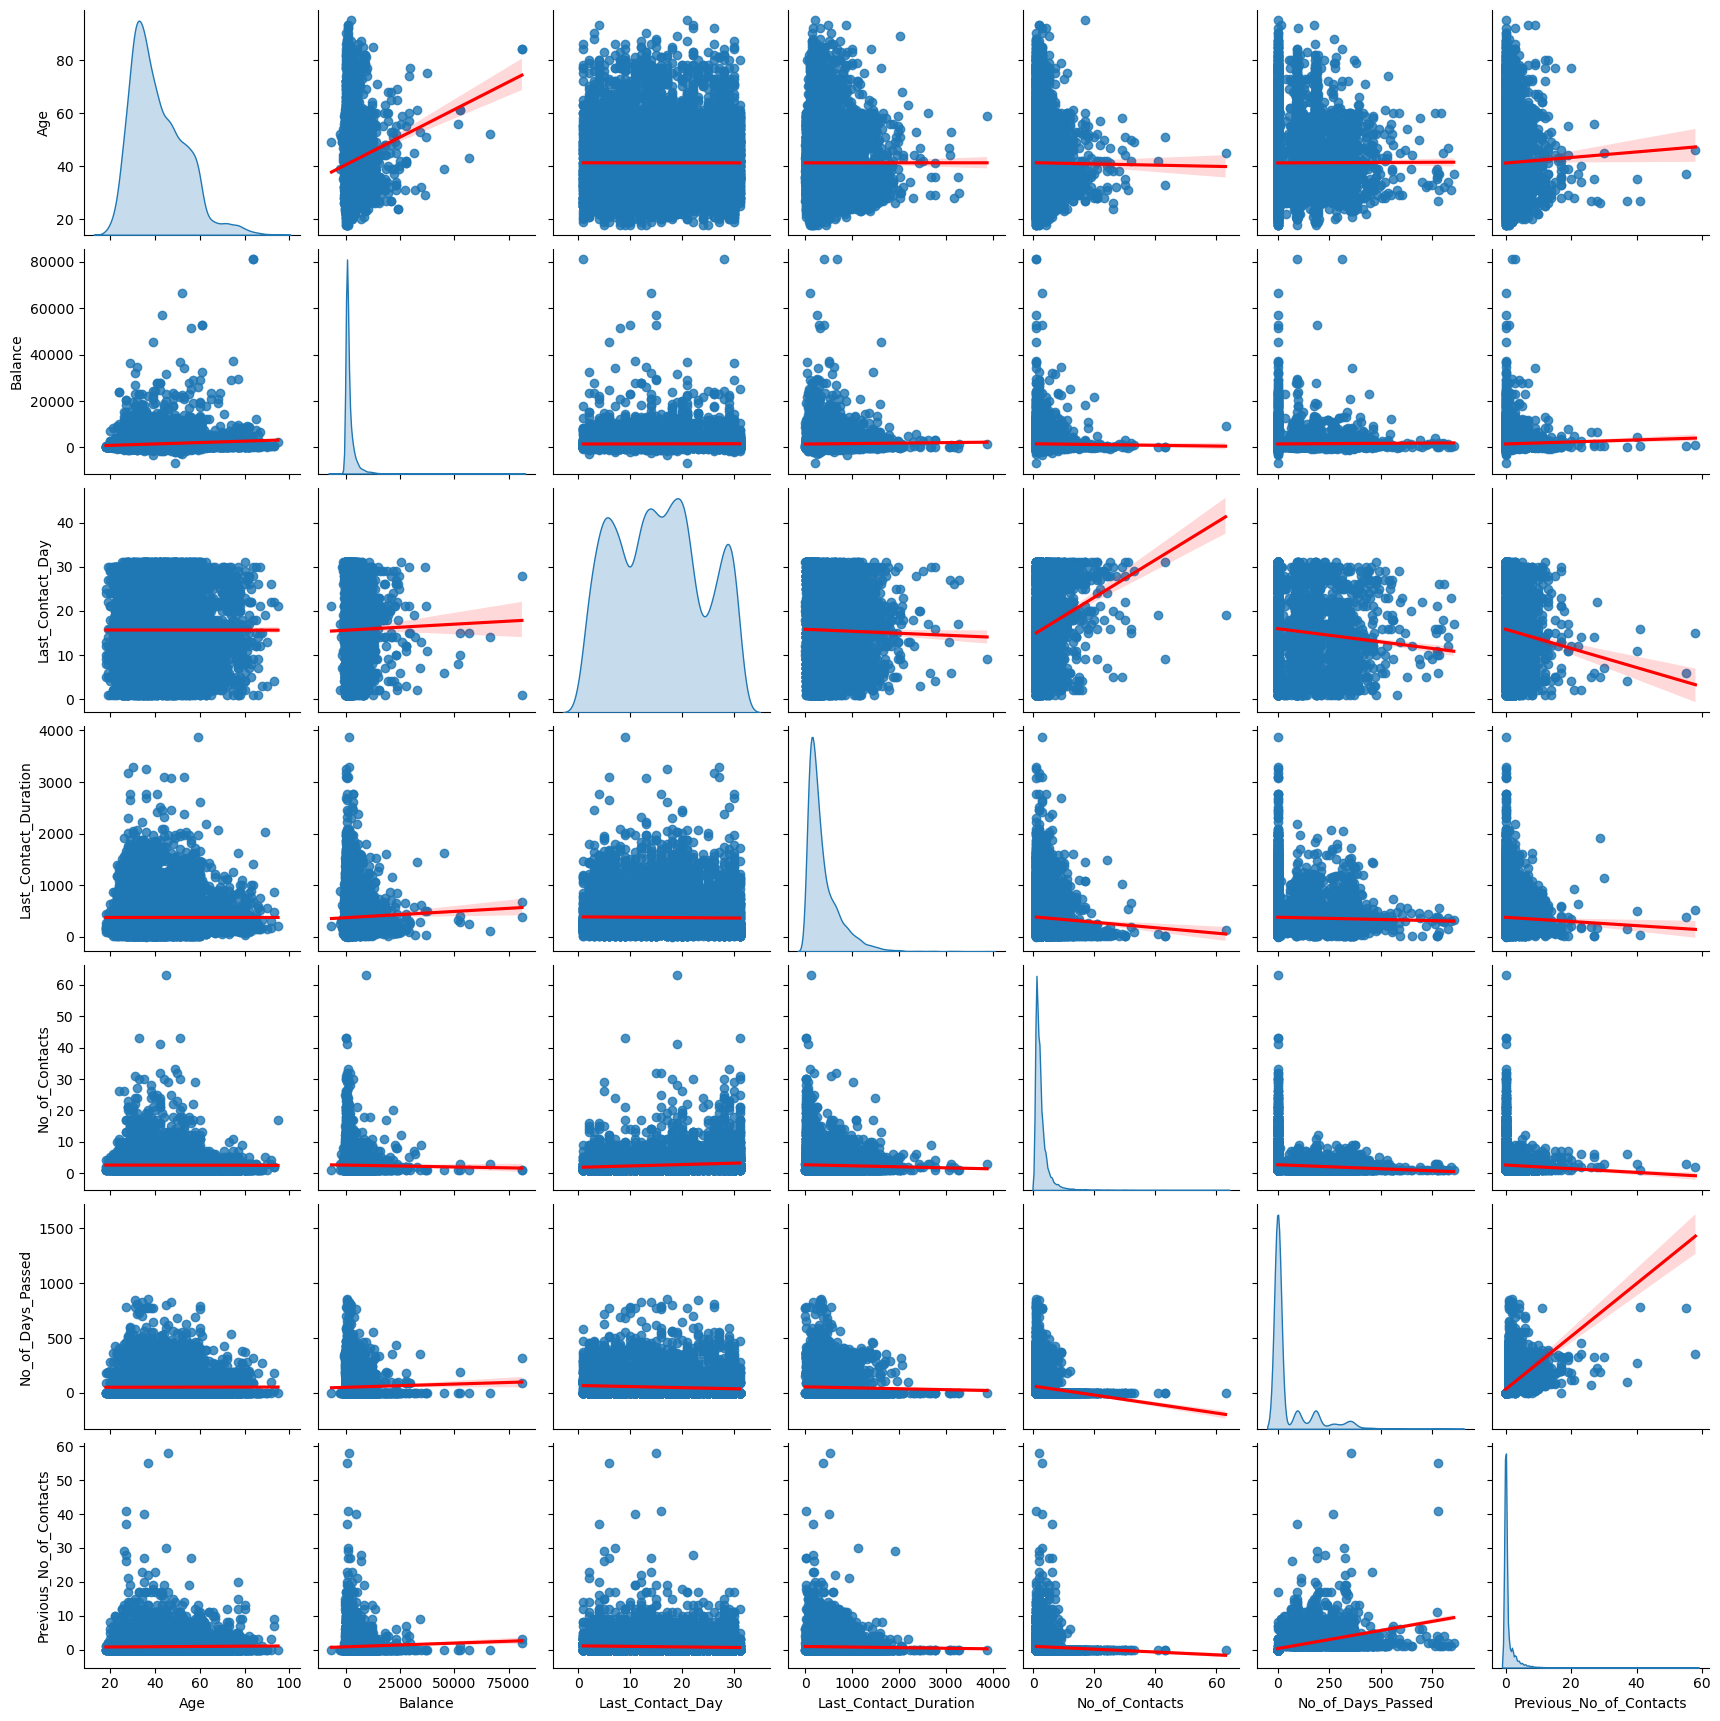

In [22]:
# a pairwise relationships in a dataset.
sns.pairplot(df,kind='reg', plot_kws={'line_kws':{'color':'red'}}, diag_kind='kde')
plt.show()

#### <font color=blue>Correlation</font>

<AxesSubplot:>

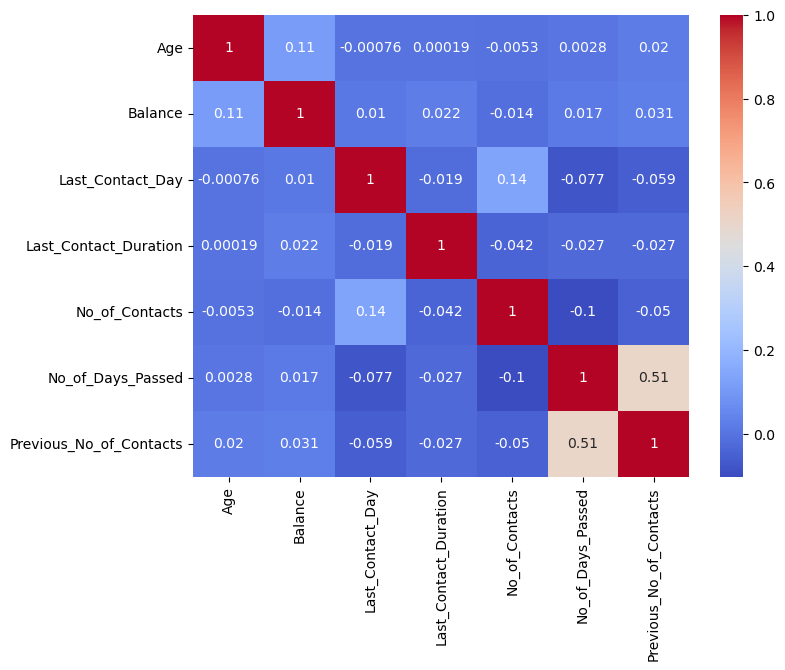

In [23]:
plt.figure(figsize=(8,6))
cr=df.corr()
sns.heatmap(cr, annot=True, cmap="coolwarm")

<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> Most of the vars are neither positively nor negatively correlated </li>
     <li>Only little correlation among 'Previous_No_of_Contacts' and 'No_of_Days_Passed'  </li>  
     
</ul>
</div>

#### <font color=blue>v. Target variable vs num features Analysis </font>

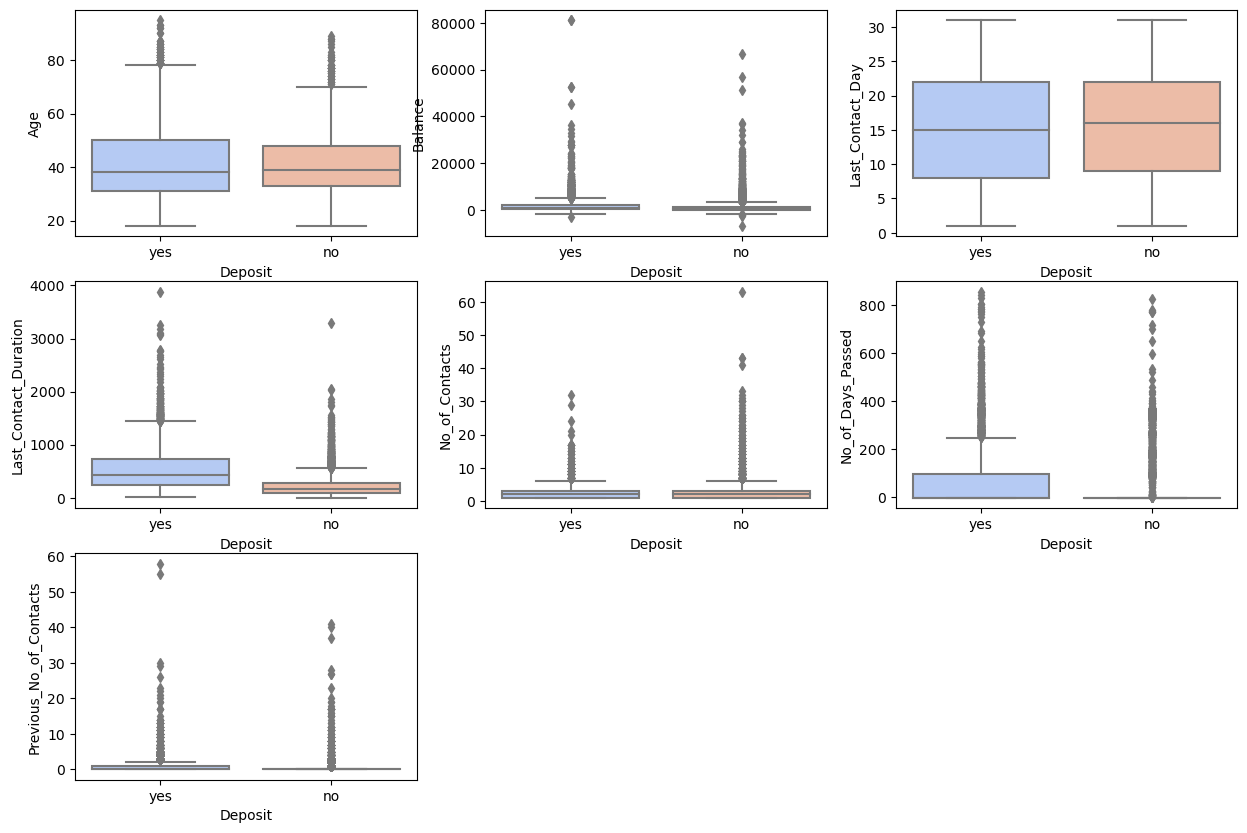

In [24]:
# boxplots to show values of num features across Target var
fig=plt.figure(figsize=(15,10))
palette=sns.color_palette('coolwarm', n_colors=2)
for i in range(len(num_features)):
    column= num_features[i]
    sub=fig.add_subplot(3,3,i+1)
    sns.boxplot(x='Deposit', y=column, data=df, palette=palette)

<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> client who had discussion for longer duration show interest on deposit </li>  
</ul>
</div>

#### <font color=blue>vi. Target variable vs cat features Analysis </font>

In [25]:
len(cat_features)

9

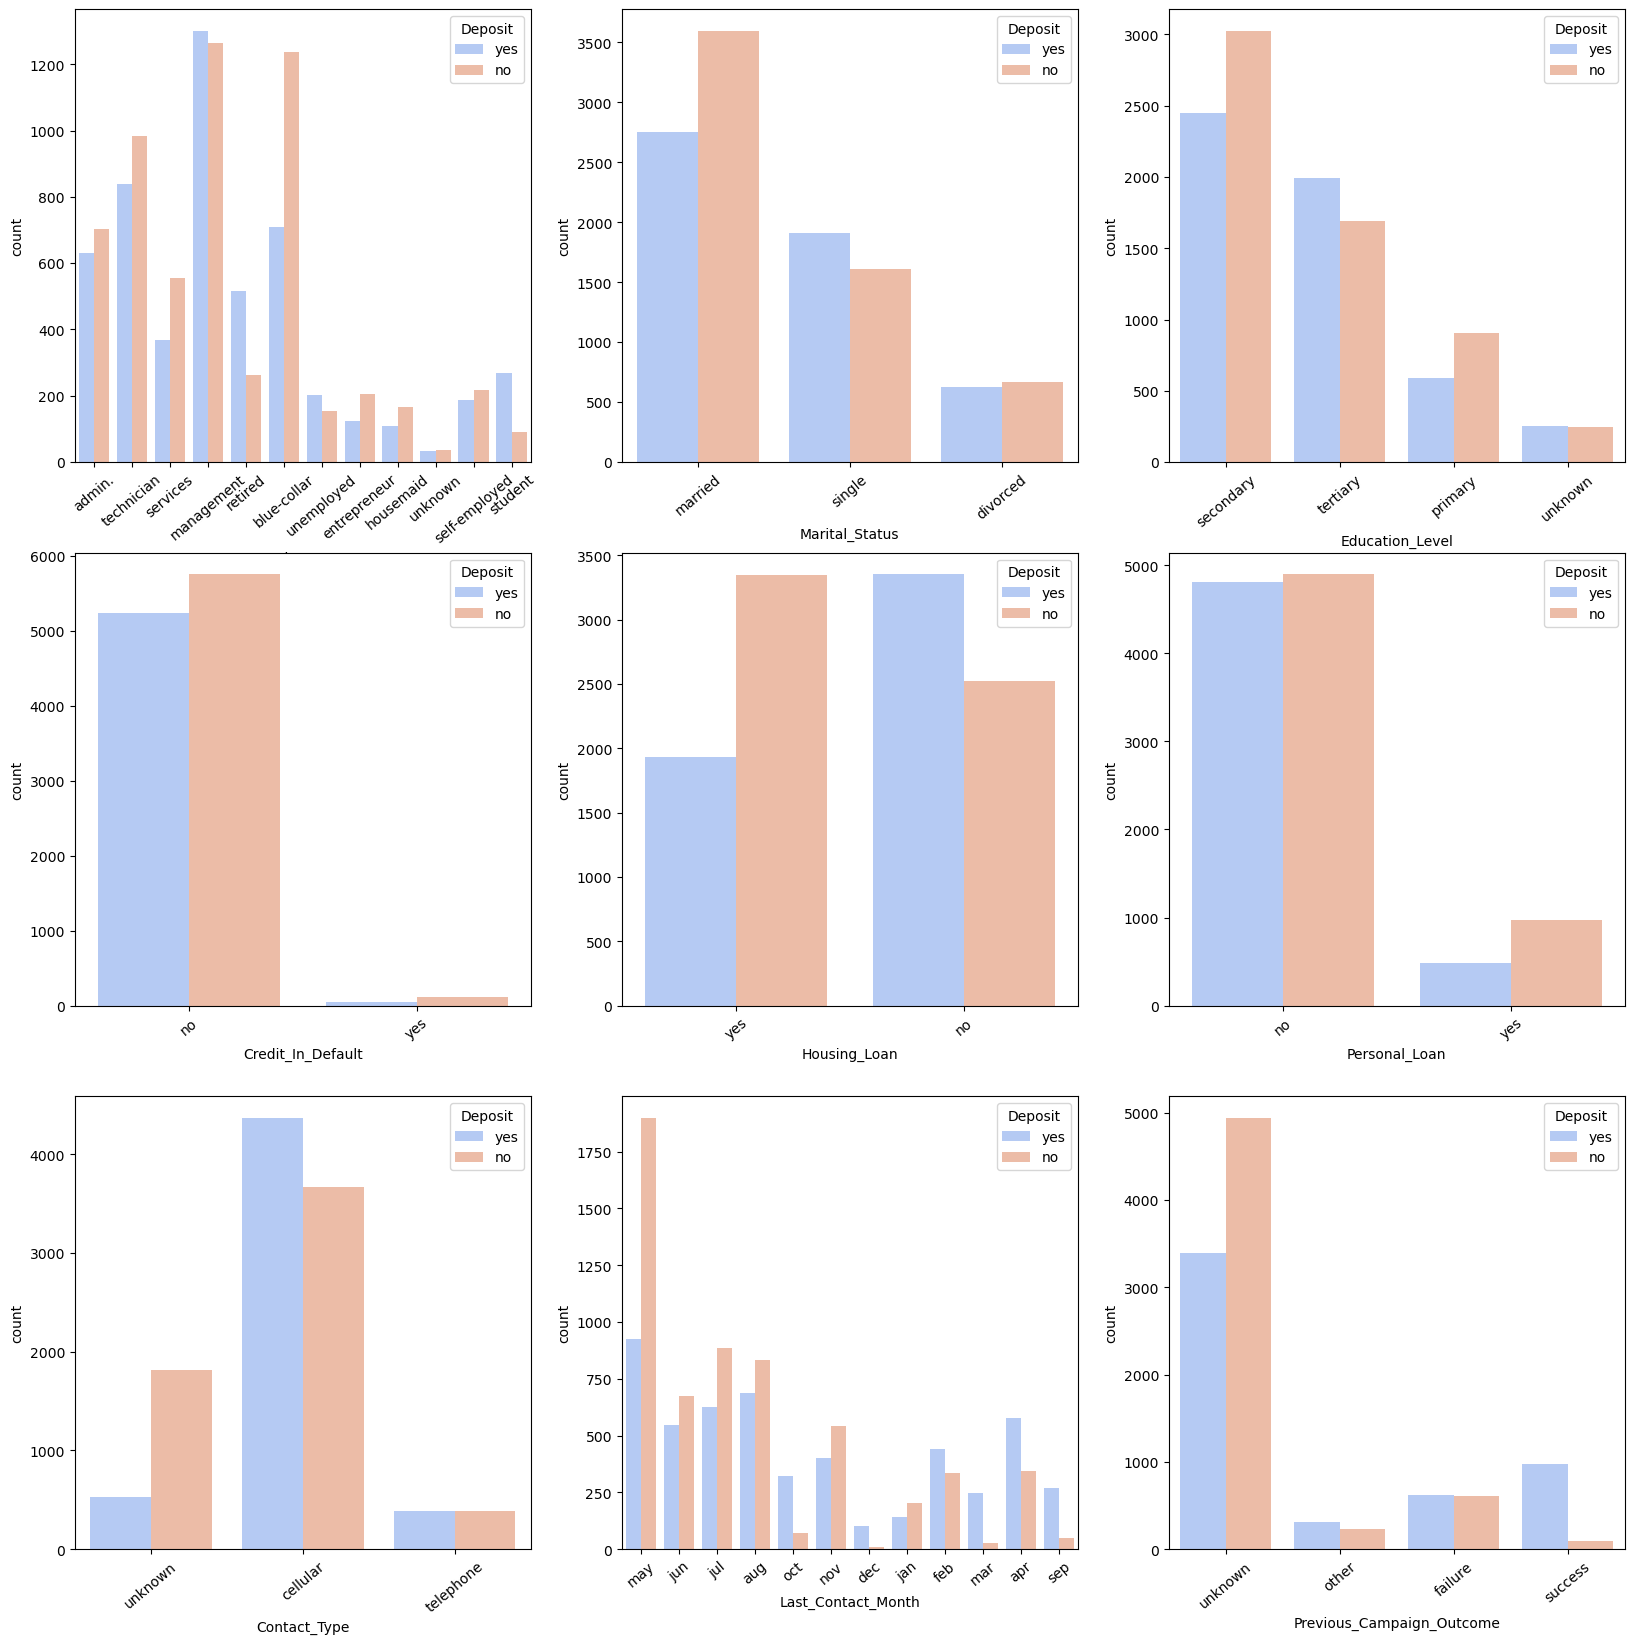

In [26]:
# Visualize distributions of categorical features by target value
# Create plot for each categorical feature
# Create countplot showing count of each category by target value
i = 0
plt.figure(figsize=(20,20))
for cat_feature in cat_features:
    i += 1
    plt.subplot(3, 3, i)
    plt.xticks(rotation=40)
    sns.countplot(x = df[cat_feature], data = df, hue = "Deposit", palette=sns.color_palette('coolwarm', n_colors=2))
plt.show()

<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> Clients in 'Services', 'Blue-colar' and 'Students' jobs have high interest on deposit.</li>
     <li>Clients who are single have more interest on deposit than married ones.</li> 
     <li> Clients who with tertiary level educ have more interest on deposit than other educ level clients. </li>
     <li>Default credit has negative effect on signing up the term deposit. </li> 
     <li> client who has housing loan seems to be not interested much on deposit. </li>
     <li>Personalloan has negative effect on signing up the term deposit.</li> 
     <li>Cellular phone communication is effective way of the campaign.</li>
     <li>In month of February, March,April, September, October and December, clients show high interest to deposit.But in month </li> 
     <li>of May, records are high but client interst ratio is very less. </li>     
     <li>If previous campagin outcome=success then, there is high chance of client to show interest on deposit.  </li>      
 </ul>
</div>

## <font color=blue>Feature Engineering</font>

#### <font color=blue>Drop non significant Features</font>

In [27]:
df_engineer=df.copy()

In [28]:

print((df_engineer['Credit_In_Default'].value_counts())/(len(df_engineer))*100)

no     98.494893
yes     1.505107
Name: Credit_In_Default, dtype: float64


<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> More than 98% of the data for this column contains 'no' value, hence it is insignificant column and will drop it</li>
</ul>
</div>

In [29]:
df_engineer.drop('Credit_In_Default', axis=1, inplace=True)

In [30]:
print((df_engineer['No_of_Days_Passed'].value_counts())/(len(df_engineer))*100)

-1      74.574449
 92      0.949651
 182     0.797348
 91      0.752553
 181     0.725676
          ...    
 437     0.008959
 728     0.008959
 518     0.008959
 828     0.008959
 118     0.008959
Name: No_of_Days_Passed, Length: 472, dtype: float64


<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> More than 74% of the data for this column contains -1 value, hence it is insignificant column and will drop it</li>
</ul>
</div>

In [31]:
df_engineer.drop('No_of_Days_Passed', axis=1, inplace=True)

In [32]:
df_engineer.shape

(11162, 15)

#### <font color=blue>Handle Missing Values</font>




<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> From EDA, there are no missing values in the dataset</li>
</ul>
</div>

#### <font color=blue>Handle Outliers in numerical columns</font>

In [33]:
num_features = (df_engineer.select_dtypes(include=['int64'])).columns
num_features

Index(['Age', 'Balance', 'Last_Contact_Day', 'Last_Contact_Duration',
       'No_of_Contacts', 'Previous_No_of_Contacts'],
      dtype='object')

In [34]:
df_engineer.groupby(['Deposit','Balance'],sort=True)['Balance'] .count()

Deposit  Balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: Balance, Length: 5082, dtype: int64

<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> All 'Balance' values close to the min value result in 'no' for the target column</li>
     <li> And all 'Balance' values close to the man value result in 'yes' for the target column</li>
</ul>
    Hence no need to handle outliers in the 'Balance' column 
</div>


In [35]:
df_engineer.groupby(['Deposit','Last_Contact_Duration'],sort=True)['Last_Contact_Duration'].count()

Deposit  Last_Contact_Duration
no       2                        1
         3                        1
         4                        2
         5                        4
         6                        6
                                 ..
yes      3094                     1
         3102                     1
         3183                     1
         3253                     1
         3881                     1
Name: Last_Contact_Duration, Length: 2157, dtype: int64

<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> All 'Last_Contact_Duration' values close to the min value result in 'no' for the target column</li>
     <li> And all 'Last_Contact_Duration' values close to the man value result in 'yes' for the target column</li>
</ul>
    Call uration matters in making or not making deposits;Hence no need to handle outliers in the 'Last_Contact_Duration' column too
</div>


 ####  Replace outliers in other num columns with the lower and upper bounds
Steps:
* Calculate the IQR for each numerical column.
* Determine the lower and upper bounds for outliers using the IQR.
* Replace the outliers with the median value.

In [36]:
cols = ['No_of_Contacts', 'Previous_No_of_Contacts']

for column in cols:

    Q1 = df_engineer[column].quantile(0.25)
    Q3 = df_engineer[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_engineer[column] = np.where(df_engineer[column] < lower_bound, lower_bound, df_engineer[column])
    df_engineer[column] = np.where(df_engineer[column] > upper_bound, upper_bound, df_engineer[column])

In [37]:
# check 
df_engineer.groupby(['Deposit','No_of_Contacts'],sort=True)['No_of_Contacts'].count()

Deposit  No_of_Contacts
no       1.0               2237
         2.0               1627
         3.0                703
         4.0                454
         5.0                239
         6.0                613
yes      1.0               2561
         2.0               1401
         3.0                618
         4.0                317
         5.0                139
         6.0                253
Name: No_of_Contacts, dtype: int64

In [38]:
# check 
df_engineer.groupby(['Deposit','Previous_No_of_Contacts'],sort=True)['Previous_No_of_Contacts'].count()

Deposit  Previous_No_of_Contacts
no       0.0                        4940
         1.0                         304
         2.0                         237
         2.5                         392
yes      0.0                        3384
         1.0                         583
         2.0                         456
         2.5                         866
Name: Previous_No_of_Contacts, dtype: int64

***

#### <font color=blue>Handle Categorical Features</font>
> Many machine learning algorithms, particularly those based on mathematical equations, require numerical inputs. Therefore, it is necessary to convert categorical columns to numerical format before using them in ML models.

> Categorical columns with booleans('yes/no' ) values can be converted to numerical values using lambda functions
 And all other categorical features can be converted to numerical values using dummies
 
> Common techniques for converting categorical variables include label encoding, one-hot encoding, and ordinal encoding
    


In [39]:
bool_columns = []
for column in df_engineer.columns:
    unique_values = df_engineer[column].unique()
    if len(unique_values) == 2 and set(unique_values) == {'yes', 'no'}:
        
        bool_columns.append(column)

for col in  bool_columns:
    df_engineer[col+'_new']=df_engineer[col].apply(lambda x : 1 if x == 'yes' else 0)
    df_engineer.drop(col, axis=1, inplace=True)

In [40]:
# one-hot encoding
cat_columns = ['Job_Type', 'Marital_Status', 'Education_Level', 'Contact_Type', 'Last_Contact_Month', 'Previous_Campaign_Outcome']
for col in  cat_columns:
    df_engineer = pd.concat([df_engineer.drop(col, axis=1),pd.get_dummies(df_engineer[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [41]:
df_engineer.head()

,Age,Balance,Last_Contact_Day,Last_Contact_Duration,No_of_Contacts,Previous_No_of_Contacts,Housing_Loan_new,Personal_Loan_new,Deposit_new,Job_Type_blue-collar,...,Last_Contact_Month_jul,Last_Contact_Month_jun,Last_Contact_Month_mar,Last_Contact_Month_may,Last_Contact_Month_nov,Last_Contact_Month_oct,Last_Contact_Month_sep,Previous_Campaign_Outcome_other,Previous_Campaign_Outcome_success,Previous_Campaign_Outcome_unknown
0,59,2343,5,1042,1.0,0.0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1.0,0.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1.0,0.0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1.0,0.0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2.0,0.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## <font color=blue>Split Dataset</font>

In [42]:
#  features (X) and the target variable (y)
X=df_engineer.drop("Deposit_new", axis=1)
y=df_engineer["Deposit_new"]

In [43]:
X

,Age,Balance,Last_Contact_Day,Last_Contact_Duration,No_of_Contacts,Previous_No_of_Contacts,Housing_Loan_new,Personal_Loan_new,Job_Type_blue-collar,Job_Type_entrepreneur,...,Last_Contact_Month_jul,Last_Contact_Month_jun,Last_Contact_Month_mar,Last_Contact_Month_may,Last_Contact_Month_nov,Last_Contact_Month_oct,Last_Contact_Month_sep,Previous_Campaign_Outcome_other,Previous_Campaign_Outcome_success,Previous_Campaign_Outcome_unknown
0,59,2343,5,1042,1.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1.0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,733,16,83,4.0,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,29,19,156,2.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,8,9,2.0,2.5,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


#### <font color=blue>Data Inbalance</font>

In [44]:
y.value_counts()

0    5873
1    5289
Name: Deposit_new, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
X_resampled, y_resampled =SMOTE().fit_resample(X,y)

In [47]:
y_resampled.value_counts()

1    5873
0    5873
Name: Deposit_new, dtype: int64

<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> target column is now fully balanced</li>   
   </ul>
</div>


In [48]:
# split it into separate training and testing sets, 20% of data used for testing
X_train,X_test, y_train,  y_test=train_test_split(X_resampled,y_resampled,test_size=0.2, random_state=42)

In [49]:
print("X_train: ",len(X_train))
print("X_test: ",len(X_test))
print("y_train: ",len(y_train))
print("y_test: ",len(y_test))

X_train:  9396
X_test:  2350
y_train:  9396
y_test:  2350


In [50]:
X_test.shape

(2350, 40)

#### <font color=blue>Handle Feature Scalling</font>
<div class="alert alert-block alert-info">
    <ul>
        This will help in 
     <li> Normalization of feature magnitudes</li>   
     <li>Improved convergence of optimization algorithms:</li>  
   </ul>
</div>

In [51]:
st=StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [52]:
X_train

array([[ 2.50267227,  0.93963708,  0.04892593, ..., -0.21792576,
        -0.31680126,  0.60292423],
       [ 0.65218834, -0.35101377,  1.84185916, ..., -0.21792576,
        -0.31680126,  0.60292423],
       [ 0.65218834, -0.68025218,  1.72233028, ..., -0.21792576,
        -0.31680126,  0.60292423],
       ...,
       [-0.52539234, -0.12245157,  0.52704146, ..., -0.21792576,
        -0.31680126,  0.60292423],
       [ 0.82041415, -0.24277929,  1.12468587, ..., -0.21792576,
        -0.31680126,  0.60292423],
       [-0.94595687, -0.46771352,  0.88562811, ..., -0.21792576,
        -0.31680126,  0.60292423]])

#### <font color=blue>Principal Component Analysis (PCA)</font>

In [53]:
pca=PCA(n_components=0.95)  # 95% of principal components to retain after the dimensionality reduction

In [54]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
#  the cumulative explained variance ratio of the principal components obtained from the PCA transformation.
sum(pca.explained_variance_ratio_)

0.9516850341372611

## <font color=blue>Model Selection</font>

### <font color=red>A. Logistic regression</font>

In [55]:
params_lg = {'C': [0.1, 1, 10],
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear', 'saga']}
lg=LogisticRegression(random_state=42)
grid_lg = GridSearchCV(lg, params_lg, cv=5, n_jobs=-1)
grid_lg.fit(X_train, y_train)
#
print("Best hyperparameters: ", grid_lg.best_params_)

y_pred_lg = grid_lg.predict(X_test)


Best hyperparameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [56]:
# LogisticRegression with best params
lg = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
grid_lg = GridSearchCV(lg, params_lg, cv=5, n_jobs=-1)
grid_lg.fit(X_train, y_train)
y_pred_lg = grid_lg.predict(X_test)

In [57]:
acc_sc=accuracy_score(y_test, y_pred_lg)

### <font color=red>B. SVC (Support Vector Classifier) </font>

In [58]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i], random_state=42)
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

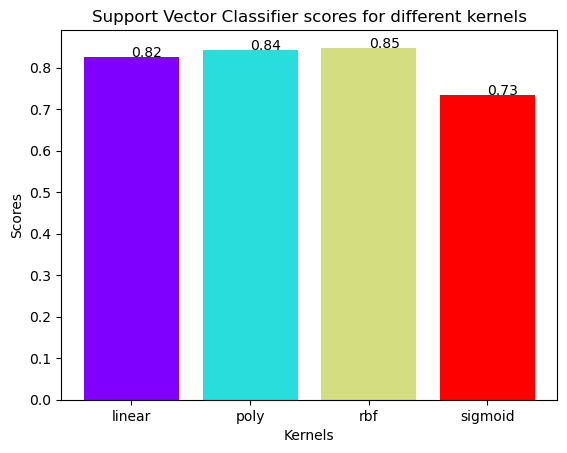

In [59]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], "{:.2f}".format(svc_scores[i]))
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.show()

In [60]:
# svc with best params
svc=SVC(kernel='rbf', random_state=42)
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)

In [61]:
acc_sc=accuracy_score(y_test, y_pred_svc)

### <font color=red>C. KNN (K-Nearest Neighbors) </font>

In [65]:
knn = KNeighborsClassifier()
k_range = list(range(1, 41))
param_knn = dict(n_neighbors=k_range)
grid_knn = GridSearchCV(knn, param_knn, cv=10, scoring='accuracy')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [66]:
print(grid_knn.best_params_)

{'n_neighbors': 5}


In [67]:
# knn with best params
param_knn = {
    'n_neighbors': [5] 
}

In [68]:

knn= KNeighborsClassifier(n_neighbors=7)
grid_knn = GridSearchCV(knn, param_knn, cv=10, scoring='accuracy')
grid_knn.fit(X_train, y_train)

best_model = grid_knn.best_estimator_
y_pred_knn = best_model.predict(X_test)

In [69]:
acc_sc=accuracy_score(y_test, y_pred_knn)

### <font color=red>E. RF(Random Forest)</font>

In [70]:
param_rf = {
    'n_estimators': [10,50,100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [71]:
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

In [72]:
print(grid_rf.best_params_)


{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [73]:
# RF with best params
rfc= RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=10,min_samples_leaf=2, random_state=42)
rfc.fit(X_train,y_train)

y_pred_rfc= rfc.predict(X_test)
acc_sc=accuracy_score(y_test, y_pred_rfc)

### <font color=red>F. GBC(Gradient Boosting Classiefier)</font>

In [74]:
param_gbc = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}


In [75]:

gbc = GradientBoostingClassifier(random_state=42)

In [76]:
grid_search = GridSearchCV(gbc, param_gbc, cv=5, scoring='accuracy')

In [77]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [78]:
best_params_gbc = grid_search.best_params_
best_score = grid_search.best_score_

In [79]:
gbc_best = GradientBoostingClassifier(random_state=42, **best_params_gbc)
gbc_best.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)

In [80]:
y_pred_gbc = gbc_best.predict(X_test)
acc_sc = accuracy_score(y_test, y_pred_gbc)

In [81]:
best_params_gbc

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

### <font color=red>G. XGBoost</font>

In [82]:
import xgboost as xgb
from xgboost import XGBClassifier

In [83]:
xgb = XGBClassifier()

In [84]:
from sklearn.pipeline import Pipeline

In [85]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier())
])

In [86]:
param_xgb = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.5],
    'xgb__max_depth': [3, 5, 7]
}


In [87]:
grid_search_xgb = GridSearchCV(pipeline, param_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                     

In [88]:
# xgb with best params
xgb = XGBClassifier(n_estimators=grid_search_xgb.best_params_['xgb__n_estimators'],
                    learning_rate=grid_search_xgb.best_params_['xgb__learning_rate'],
                    max_depth=grid_search_xgb.best_params_['xgb__max_depth'])
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [89]:
print('Best hyperparameters:', grid_search_xgb.best_params_)

Best hyperparameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 100}


In [90]:
y_pred_xgb=xgb.predict(X_test)

In [91]:
acc_sc = accuracy_score(y_test, y_pred_xgb)

## <font color=blue>Model Comparison </font> 

In [92]:
model_compare= pd.DataFrame({'models':["LogReg","SVC", "KNN", "RFC","GBC","XGB"],
                           'accuracy':[accuracy_score(y_test, y_pred_lg)*100,
                                      accuracy_score(y_test, y_pred_svc)*100,
                                      accuracy_score(y_test, y_pred_knn)*100,                                    
                                      accuracy_score(y_test, y_pred_rfc)*100,
                                      accuracy_score(y_test, y_pred_gbc)*100,
                                      accuracy_score(y_test, y_pred_xgb)*100]})

In [93]:
model_compare

,models,accuracy
0,LogReg,82.255319
1,SVC,84.765957
2,KNN,77.659574
3,RFC,83.276596
4,GBC,83.319149
5,XGB,83.234043


<AxesSubplot:xlabel='models', ylabel='accuracy'>

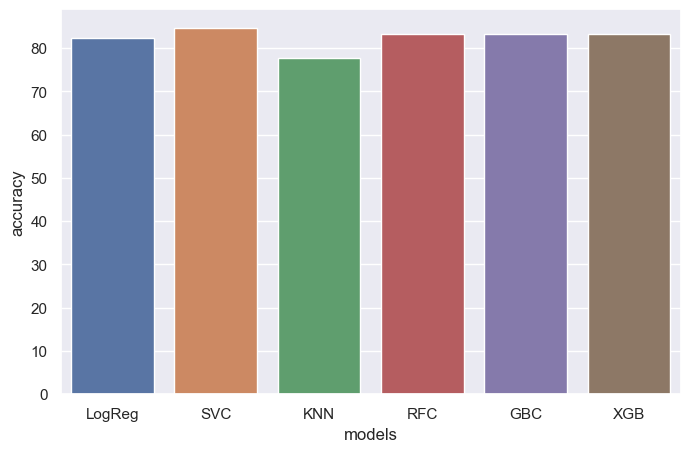

In [94]:
sns.set(rc={"figure.figsize":(8, 5)}) 
sns.barplot(x=model_compare['models'], y=model_compare['accuracy'])

<div class="alert alert-block alert-info">
    <b>Best Algorithm chosen for this dataset and hence selecting it to model building</b>&#9658
    <ul>
     <li> SVC </li>   
   </ul>
</div>
<div class="alert alert-block alert-warning">
    <b>Best Algorithm chosen for this dataset is based only on model accuracy; Accuracy alone does not provide a complete picture of a model's performance, as it may not account for other important factors such as model complexity, interpretability, computational efficiency, robustness to imbalanced data, and suitability for the specific problem at hand. Nice to check </b>&#9658
    <ul>
     <li> Precision, Recall, F1 Score </li>   
   </ul>
</div>

## <font color=blue>Model Building using the best selected algorithm</font>

In [95]:
# svc for model bldng
model_svc=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)

In [96]:
model_svc.fit(X,y)

SVC(gamma='auto', random_state=42)

In [97]:
y_pred_model_svc=model_svc.predict(X)

In [98]:
acc_score_svc=accuracy_score(y, y_pred_model_svc)

In [99]:
acc_score_svc

0.9978498476975453

## <font color=blue>Confusion Matrix </font>

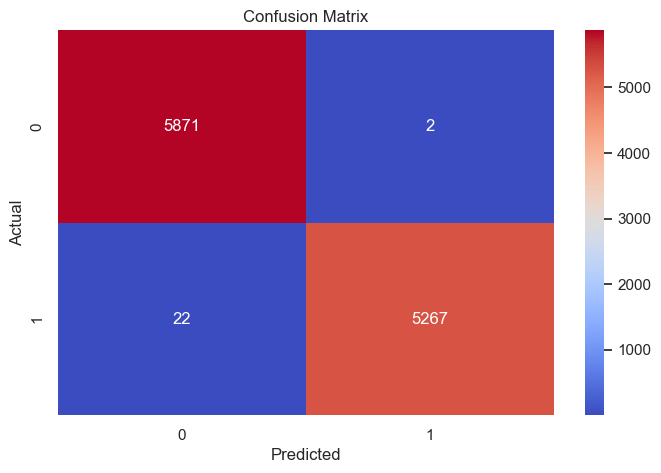

In [100]:
cm = confusion_matrix(y, y_pred_model_svc)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

____

$$\text{Accuracy} = \frac{{\text{TP + TN}}}{{\text{TP + TN + FP + FN}}} = \frac{{\text{5871 + 5267}}}{{\text{5871 + 5267+ 22 + 2}}}=0.9978$$

$$Precision = \frac{TP}{TP + FP} = \frac{5267}{5289} = 0.9958$$


$$Recall = \frac{TP}{TP + FN} = \frac{5267}{5269} = 0.9996$$

$$F1\_Score = \frac{2 \times (Precision \times Recall)}{Precision + Recall}= 1.9954$$

## <font color=blue>Feature Importance </font> 

<div class="alert alert-block alert-info">
    SVC with an RBF kernel doesn't inherently provide direct feature importances like some other models. The RBF kernel in SVC models uses a non-linear mapping of features into a higher-dimensional space. We can consider employing techniques such as Partial Dependence Plots (PDPs) or SHAP values.  
 
</div>


## <font color=blue>Save The Model </font> 

In [101]:
import joblib

In [102]:
from joblib import dump, load

In [103]:
import sklearn

In [104]:
scikit_ver=sklearn.__version__
scikit_ver

'1.0.2'

In [105]:
joblib.dump(model_svc, 'abcd.pkl'.format(version=scikit_ver))

['abcd.pkl']